## Hands-on 2

by Arsyadana Estu Aziz (121140068)

This Hands-on consist of several steps, it consist of 3 question and each question is different. 
The sample being used in here is on the `attachment` folder, on file `sample.jpeg`

### Task 1
1. Diberikan sebuah foto selfie saya sendiri, akan dilaukkan proses editing pada wajah saya menggunakan python dan `cv2`

In [8]:
## Import Necerssary Libraries
import numpy as np
import matplotlib.pyplot as plt 
import cv2 
import os

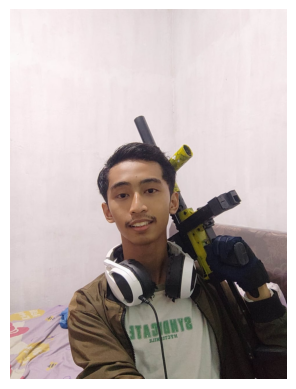

(1280, 958, 3)


In [9]:
## Open Image and Display it
image = cv2.imread('attachment/sample.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)  
plt.axis('off')
plt.show()
print(image.shape)

**Task 1.1** : Resize the Image into 1080 on the Longest dimension

Dari sampel tersebut didapatkan bahwa shape dari image tersebut memiliki dimensi (1280, 958, 3)
- Element tersebut merupakan tinggi, lebar dan color channels (RGB value). Kita akan melakukan resizing untuk dimensi tinggi menjadi 1080 sesuai deskripsi.

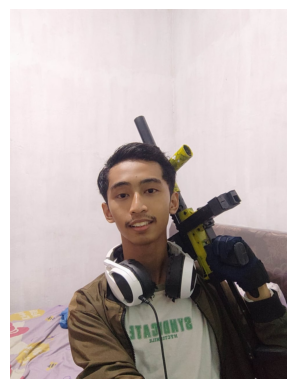

(1080, 808, 3)


In [10]:
## Getting the image height and width (Getting the last two elements of the shape)
height, width = image.shape[:2]

## Setup max limit for the image
limit = 1080

## Calculate the scaling factor for the image
scaling_factor = min(limit/height, limit/width)

## Calcualte the new dimensions of the image
new_dimensions = (int(scaling_factor * width), int(scaling_factor * height))

## Resize the image 
image_resized = cv2.resize(image, new_dimensions, interpolation = cv2.INTER_AREA)

## Show the image
plt.imshow(image_resized)
plt.axis('off')
plt.show()
print(image_resized.shape)

**Task 1.2**: Create a yellow frame with the thickness of 25 + NIM

Kita bisa menggunakan `cv2.copyMakeBorder` untuk membaut sebuah frame border. Namun border ini akan meningkatkan dimensi panjang dan lebar dari image.

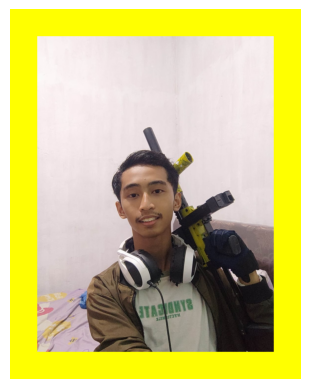

(1266, 994, 3)


In [11]:
# Define the thickness of the frame
NIM_last_two_digits = 68  
frame_thickness = 25 + NIM_last_two_digits

# Define the color for the frame (yellow)
yellow = (255, 255, 0)

# Add the yellow frame around the image
framed_image = cv2.copyMakeBorder(image_resized, frame_thickness, frame_thickness, frame_thickness, frame_thickness, cv2.BORDER_CONSTANT, value=yellow)

# Display the image with the frame
plt.imshow(framed_image)
plt.axis('off')
plt.show()
print(framed_image.shape)

**Task 1.3** : Control the color intensity on the red / blue and show it in the Histogram.

Mari kita visualisasi-kan histogram dari gambar sebelum dan sesudah dilakukan framing.


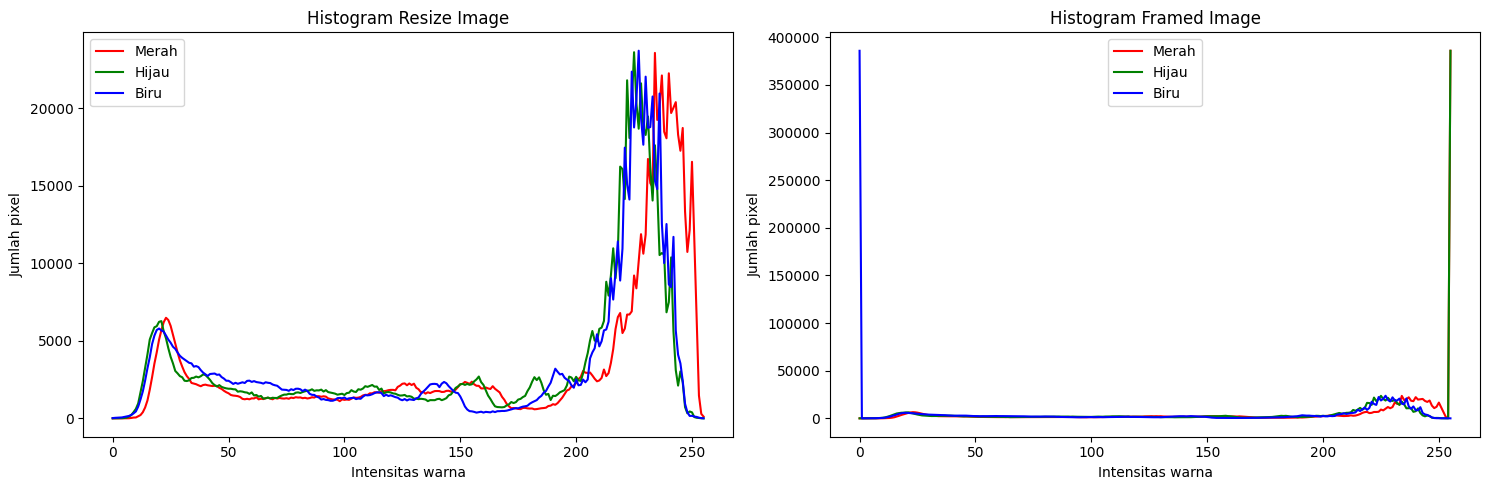

In [12]:
histo_red_resize_image = cv2.calcHist([image_resized], [0], None, [256], [0, 256])
histo_green_resize_image = cv2.calcHist([image_resized], [1], None, [256], [0, 256])
histo_blue_resize_image = cv2.calcHist([image_resized], [2], None, [256], [0, 256])

histo_red_framed_image = cv2.calcHist([framed_image], [0], None, [256], [0, 256])
histo_green_framed_image = cv2.calcHist([framed_image], [1], None, [256], [0, 256])
histo_blue_framed_image = cv2.calcHist([framed_image], [2], None, [256], [0, 256])

ax,fig = plt.subplots(1, 2, figsize=(15, 5))
fig[0].plot(histo_red_resize_image, color='red')
fig[0].plot(histo_green_resize_image, color='green')
fig[0].plot(histo_blue_resize_image, color='blue')
fig[0].set_title('Histogram Resize Image')
fig[0].set_xlabel('Intensitas warna')
fig[0].set_ylabel('Jumlah pixel')
fig[0].legend(['Merah', 'Hijau', 'Biru'])

fig[1].plot(histo_red_framed_image, color='red')
fig[1].plot(histo_green_framed_image, color='green')
fig[1].plot(histo_blue_framed_image, color='blue')
fig[1].set_title('Histogram Framed Image')
fig[1].set_xlabel('Intensitas warna')
fig[1].set_ylabel('Jumlah pixel')
fig[1].legend(['Merah', 'Hijau', 'Biru'])

plt.tight_layout()
plt.show()


Bisa dilihat dari histogram, kita lihat bahwasannya terdapat sebuah lonjakan pixel hijau dan merah (karena kuning merupakan pixel merah + hijau).

Selanjutnya akan dilakukan proses penambahan dan pengurangan intensitas warna. Disini digunakan method np.clip untuk menghindari overflow jika nilai pixel lebih dari 255.

Penjelasan numpy list sendiri sebagai berikut
```python
framed_image[50:150, :, 2]
```
- Artinya, image.shape memiliki 3 atribute (width, height, channel), disini kita memilih width 50 - 150 dan dengan chanel merah sebagai chanelnya.


Shape of the image: (1266, 994, 3)


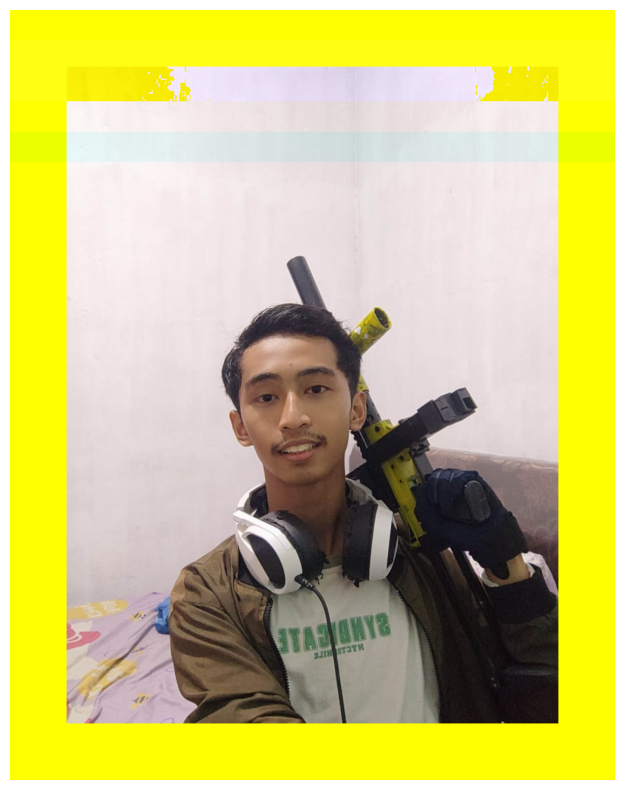

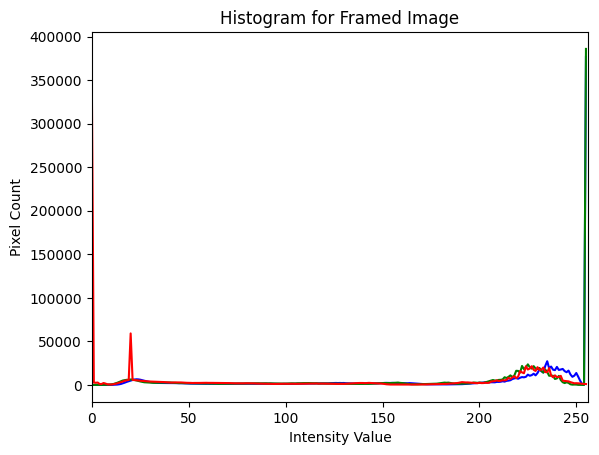

In [13]:
# Adjust red channel intensity in the middle region (50-150)
print(f"Shape of the image: {framed_image.shape}")
middle_region = framed_image[50:150, :, 2]
middle_region = np.clip(middle_region + 20, 0, 255)
framed_image[50:150, :, 2] = middle_region

# Decrease blue channel intensity in the top region (200-250)
top_region = framed_image[200:250, :, 0]
top_region = np.clip(top_region - 20, 0, 255)
framed_image[200:250, :, 0] = top_region

# Display the edited image
plt.figure(figsize=(10, 10))
plt.imshow(framed_image)
plt.axis('off')
plt.show()

## Display the histogram for the edited image
colors = ('b', 'g', 'r')
for i, color in enumerate(colors):
    histogram = cv2.calcHist([framed_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color=color)
    plt.xlim([0, 256])
plt.title('Histogram for Framed Image')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.show()

### Conclussion
Berdasarkan hasil histogram ini, dapat dilihat sebuah spike (lonjakan) pada pixel hijau dan merah.
 
Saya asumsikan bahwa ini terjadi karena dibuatnya frame kuning (merah + hijau) sehingga penambahan intensitas chanel merah dan pengurangan chanel biru sebesar 20 pixel tidak berpengaruh signifikan.

### Task 2

**Task 2.1**: Convert image from RGB to GrayScale

Mengubah format gambar dari RGB ke GrayScale cukup sederhana, kita bisa menggunakan fungsi `cv2.cvtColor()`

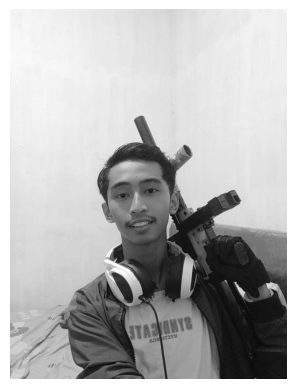

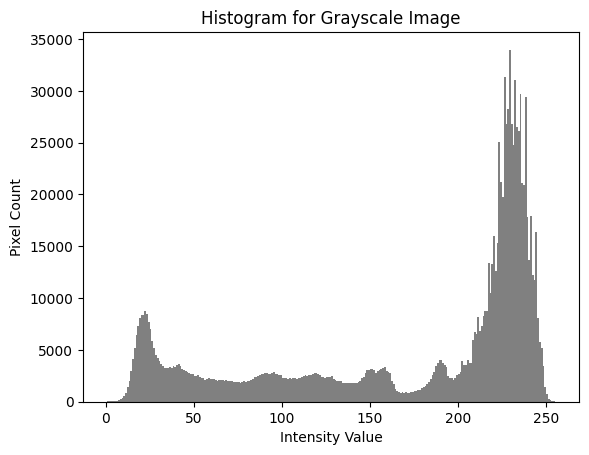

In [14]:
# Convert image from RGB to Grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

# Display histogram of the grayscale image
plt.hist(gray_image.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Histogram for Grayscale Image')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.show()

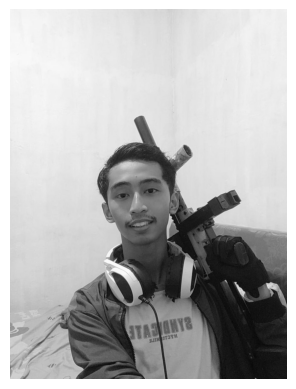

In [15]:
## Convert greyscale image to rgb image
gray_to_rgb = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)

## Plot the image
plt.imshow(gray_to_rgb)
plt.axis('off')
plt.show()


**Task 2.1:** Normalization on the Gray Image

Kita bisa menggunakan metode `cv2.normalize` untuk secara praktis melakukan normalisasi pada greyscale.

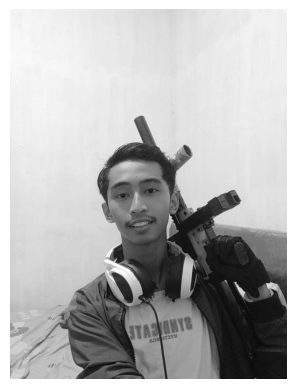

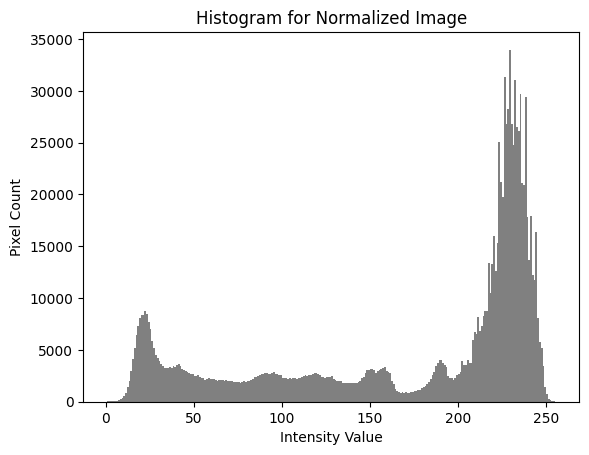

In [16]:
## Normalize Image
normalized_image = cv2.normalize(gray_image, None, 0, 255, cv2.NORM_MINMAX)

# Display the normalized image
plt.imshow(normalized_image, cmap='gray')
plt.axis('off')
plt.show()

# Display histogram of the normalized image
plt.hist(normalized_image.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Histogram for Normalized Image')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.show()


**Task 2.3**: Creating the pixel art

Kita bisa membuat pixel art sederhana dengan membuat jika intensitas warna di bawah 128, maka buat menjadi 0 (gelap) dan sebaliknya

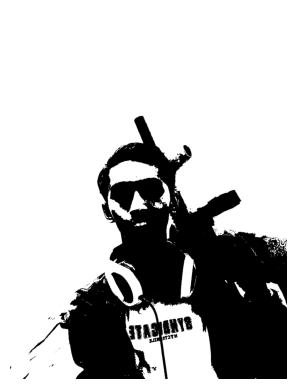

In [17]:
# Create pixel-art effect by thresholding the image
pixel_art_image = np.where(normalized_image < 128, 0, 255).astype(np.uint8)

# Display the pixel-art image
plt.imshow(pixel_art_image, cmap='gray')
plt.axis('off')
plt.show()

### Task 3

**Task 3.1**: Menaikan kecerahan (brightness) dari sebuah gambar. Kita bisa menggunakan proses normalisasi untuk mengubah tipe data menjadi `float32` untuk memudahkan proses perhitungan (mengalikan dengan faktor 10% dan melakukan clip agar tidak overflow) dan membalikan lagi menjadi dalam bentuk `uint8` yang sesuai dengan gambar.

Kenaikan 50% kecerahan memberikan efek intensitas warna putih yang dominan, sehingga histogram terlihat tidak seimbang.

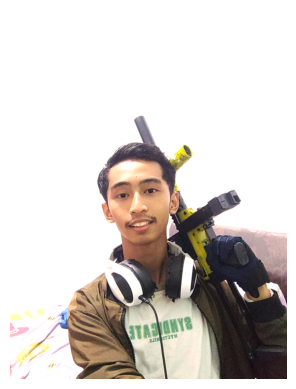

Text(0, 0.5, 'Frequency')

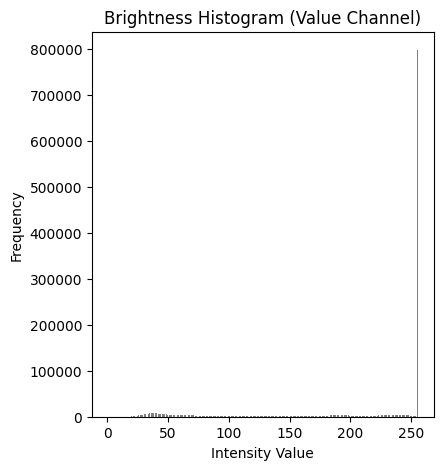

In [18]:
image = cv2.imread('attachment/sample.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to float32 and normalize
image_float32 = image.astype(np.float32) / 255.0

# Increase brightness by 50%
brightened_float32 = np.clip(image_float32 * 1.5, 0.0, 1.0)

# Convert back to uint8 for display
brightened_uint8 = (brightened_float32 * 255).astype(np.uint8)

# Convert to BGR if displaying with OpenCV
plt.imshow(brightened_uint8)
plt.axis('off') 
plt.show()

## Displaying the brightened_uint8
hsv_image = cv2.cvtColor(brightened_uint8, cv2.COLOR_BGR2HSV)

# Extract the H, S, and V channels
h_channel, s_channel, v_channel = cv2.split(hsv_image)

# Plot histograms
plt.figure(figsize=(15, 5))

# Brightness histogram (Value channel from HSV)
plt.subplot(1, 3, 1)
plt.hist(v_channel.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Brightness Histogram (Value Channel)')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')


**Task 3.2** : Turunkan saturasi warna pada foto tersebut. Saturasi merupakan intensitas warna pada gambar, semakin banyak intensitasnya maka akan semakin detail gambar yang dibuat, semakin kecil saturasiya, maka gambar akan mendekati menjadi grayscale.

Disini step yang digunakan adalah dengan mengubah gambar menjadi format HSV, sehingga kita bisa mengambil nilai dari hue (warna) , saturasi dan value (kecerahan) dari sebuah gambar.

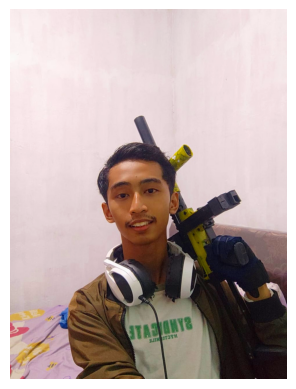

Text(0, 0.5, 'Frequency')

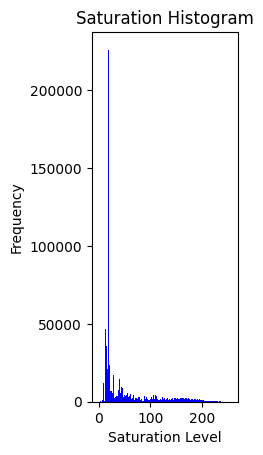

In [19]:
image = cv2.imread('attachment/sample.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image from BGR to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Extract the Saturation channel
h, s, v = cv2.split(hsv_image)

# Control the saturation by setting a factor
# Factor > 1 increases saturation, Factor < 1 decreases it
saturation_factor = 1.5  # Increase saturation by 50%
s = np.clip(s * saturation_factor, 0, 255).astype(np.uint8)

# Merge channels back
hsv_image = cv2.merge([h, s, v])

saturated_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

# Convert to BGR if displaying with OpenCV
plt.imshow(saturated_image)
plt.axis('off') 
plt.show()

hsv_image = cv2.cvtColor(saturated_image, cv2.COLOR_BGR2HSV)

# Extract the H, S, and V channels
h_channel, s_channel, v_channel = cv2.split(hsv_image)

# Saturation histogram (Saturation channel from HSV)
plt.subplot(1, 3, 2)
plt.hist(s_channel.ravel(), bins=256, range=(0, 256), color='blue')
plt.title('Saturation Histogram')
plt.xlabel('Saturation Level')
plt.ylabel('Frequency')



**Task 3.3**: Turunkan kontras pada foto tersebut, as stated, Kontras merupakan nilai dari gelap dan terang sebuah gambar. Gambar yang memiliki kontras yang tinggi akan memiliki area gelap dan terang, sebaliknya gambar dengan kontras rendah akan memiliki area dengan kecerahan yang relatif sama (mendekati warna abu-abu)

untuk menghitung formula penyesuaian kontras adalah sebagai berikut:
$$
\text{new pixel} = \text{contrast factor} * (\text{pixel} − 128) + 128
$$
Dimana:
- contrast_factor > 1.0 kontras naik,
- contrast_factor < 1.0 kontras turun,
- 128 merupkan titik tengah dari 0 - 255 sebagai penengah.


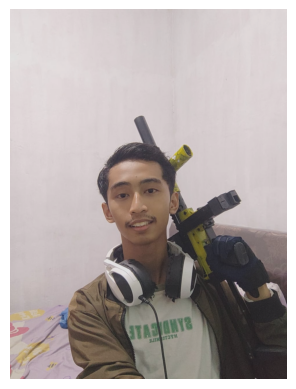

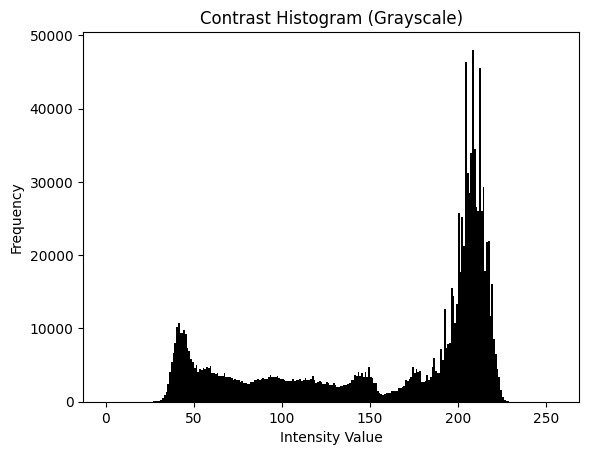

In [20]:
# Convert the image to float to prevent overflow
image_float = image.astype(np.float32)

# Interpolate between the mean and the original image to decrease contrast
contrast_factor = 0.8  # Decrease contrast by 20%

adjusted_image = np.clip(contrast_factor * (image_float - 128) + 128, 0, 255).astype(np.uint8)

# Display the low contrast image
plt.imshow(adjusted_image)
plt.axis('off')
plt.show()

# Display histogram of the low contrast image 
## extract the grayscale image
gray_image = cv2.cvtColor(adjusted_image, cv2.COLOR_BGR2GRAY)

# Plot the grayscale histogram
plt.hist(gray_image.ravel(), bins=256, range=(0, 256), color='black')
plt.title('Contrast Histogram (Grayscale)')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()


Referensi:
- [My Fellow Asistant GPT-Chan About Numpy Image Processing](https://chatgpt.com/share/67224db9-94d0-800c-b209-96e07a5e7318)
- [Reddit Post about the color properties](https://www.reddit.com/r/explainlikeimfive/comments/4k5qfc/eli5_what_is_the_difference_between_hue/)
- [Reddit post about the color properties - 2](https://www.reddit.com/r/explainlikeimfive/comments/1t5rt8/eli5_difference_between_contrast_saturation_and/)
- [Another Article on Image processing](https://yedhu.medium.com/image-manipulation-in-python-98db79cc0c1)